In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

In [14]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

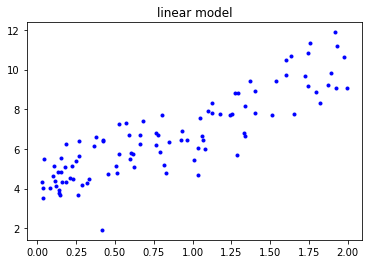

In [15]:
plt.title("linear model")
plt.plot(X,y,"b.")
plt.show()

# 경사 하강법

In [1]:
X_b = np.c_[np.ones((100, 1)), X]

eta = 0.03
n_iterations = 10001
m = 100
theta = np.random.randn(2,1)

NameError: name 'np' is not defined

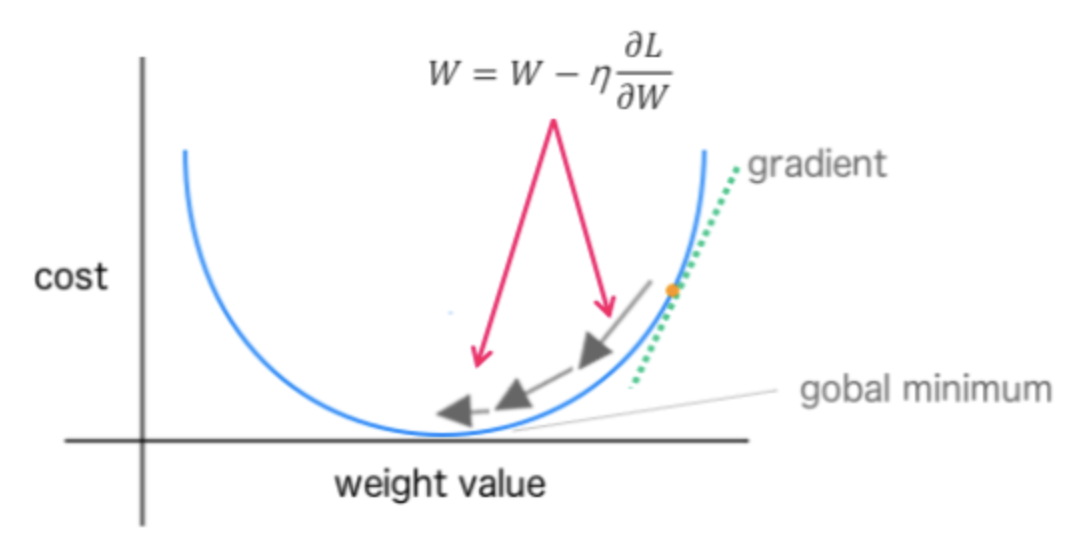

In [8]:
Image("Image/경사하강법.png",width=500)

In [17]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    if(iteration%100 == 0):
        print(gradients)
        print("")
    theta = theta - eta*gradients

[[-16.10887865]
 [-16.11046028]]

[[-0.09981626]
 [ 0.09589336]]

[[-0.03202315]
 [ 0.03083079]]

[[-0.01028432]
 [ 0.00990139]]

[[-0.00330284]
 [ 0.00317986]]

[[-0.00106072]
 [ 0.00102122]]

[[-0.00034065]
 [ 0.00032797]]

[[-0.0001094 ]
 [ 0.00010533]]

[[-3.51344667e-05]
 [ 3.38262605e-05]]

[[-1.12835280e-05]
 [ 1.08633941e-05]]

[[-3.62373523e-06]
 [ 3.48880809e-06]]

[[-1.16377227e-06]
 [ 1.12044006e-06]]

[[-3.73748580e-07]
 [ 3.59832324e-07]]

[[-1.20030359e-07]
 [ 1.15561112e-07]]

[[-3.85480719e-08]
 [ 3.71127597e-08]]

[[-1.23798163e-08]
 [ 1.19188622e-08]]

[[-3.97581006e-09]
 [ 3.82777612e-09]]

[[-1.27684139e-09]
 [ 1.22930063e-09]]

[[-4.10060697e-10]
 [ 3.94793349e-10]]

[[-1.31692381e-10]
 [ 1.26788257e-10]]

[[-4.22941682e-11]
 [ 4.07168945e-11]]

[[-1.35824330e-11]
 [ 1.30773599e-11]]

[[-4.36214620e-12]
 [ 4.19947041e-12]]

[[-1.40094158e-12]
 [ 1.34935958e-12]]

[[-4.51247928e-13]
 [ 4.32185996e-13]]

[[-1.45981005e-13]
 [ 1.38285064e-13]]

[[-4.46043202e-14]
 [ 

In [10]:
theta

array([[3.86140051],
       [3.01307622]])

# 경사 하강법 

$${MSE(w_j)={1\over m}\sum^m_{i=1} (w^T*\mathbf x^{(i)}-y^{(i))^2})}$$

<br>
<br>
$${{∂\over ∂w_j}MSE(w)={2\over m}\sum^m_{i=1}(w^T* \mathbf x^{(i)}-y^{(i)})x_j^ {(i)}}$$

In [1]:
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)),housing.data]

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01

mse_arr = []

NameError: name 'fetch_california_housing' is not defined

In [22]:
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
hypothesis = tf.matmul(X, theta, name="predictions")
error = hypothesis - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        mse_arr.append(mse.eval())
        if epoch % 100 == 0:
            print("에포크", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

에포크 0 MSE = 2.754427
에포크 100 MSE = 0.63222194
에포크 200 MSE = 0.5727803
에포크 300 MSE = 0.5585008
에포크 400 MSE = 0.54907006
에포크 500 MSE = 0.542288
에포크 600 MSE = 0.5373791
에포크 700 MSE = 0.533822
에포크 800 MSE = 0.53124255
에포크 900 MSE = 0.5293705


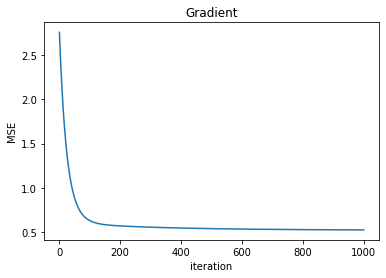

In [20]:
plt.title("Gradient")
plt.plot(np.arange(1,1001),mse_arr)
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.show()

In [43]:
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
hypothesis = tf.matmul(X, theta, name="predictions")
error = hypothesis - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = tf.train.GradientDescentOptimizer(learning_rate = 0.01) # 2/m * tf.matmul(tf.transpose(X), error)
training_op = gradients.minimize(mse) # tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("에포크", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

에포크 0 MSE = 2.754427
에포크 100 MSE = 0.63222194
에포크 200 MSE = 0.5727803
에포크 300 MSE = 0.5585009
에포크 400 MSE = 0.54907006
에포크 500 MSE = 0.542288
에포크 600 MSE = 0.5373791
에포크 700 MSE = 0.533822
에포크 800 MSE = 0.53124255
에포크 900 MSE = 0.5293704
